           CV_log10                                                    \
              count      mean       std       min       25%       50%   
Inhibitory                                                              
0              44.0 -0.277814  0.607301 -1.107272 -0.667653 -0.496939   
1              30.0  0.407460  0.505448 -0.585118  0.225029  0.548923   

                               qPCR_bact_log10                                \
                 75%       max           count      mean       std       min   
Inhibitory                                                                     
0           0.056900  0.996741            44.0 -0.256540  1.649195 -3.850369   
1           0.812198  1.002175            30.0  0.376258  1.015297 -2.684663   

                                                    
                 25%       50%       75%       max  
Inhibitory                                          
0          -1.882879  0.495187  1.069168  1.655966  
1           0.148890 

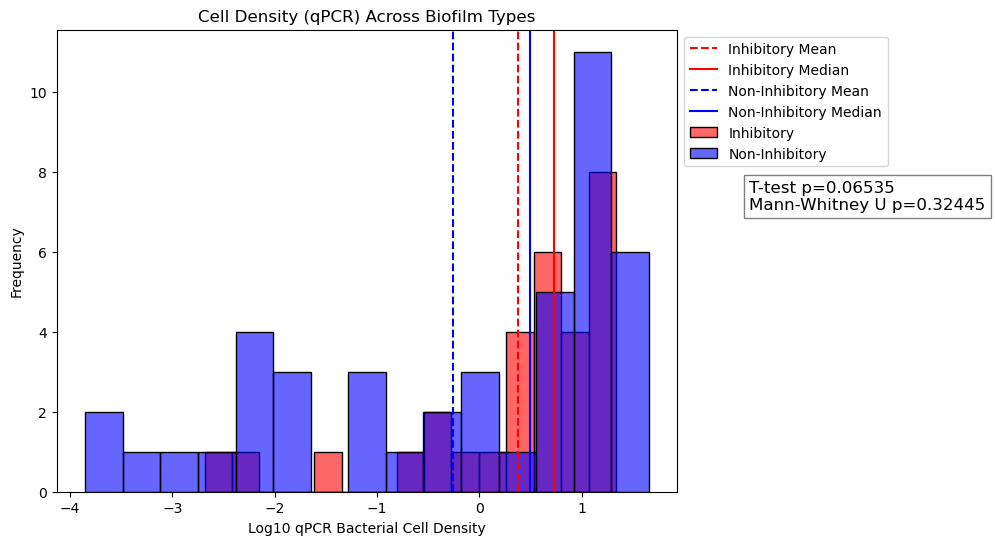

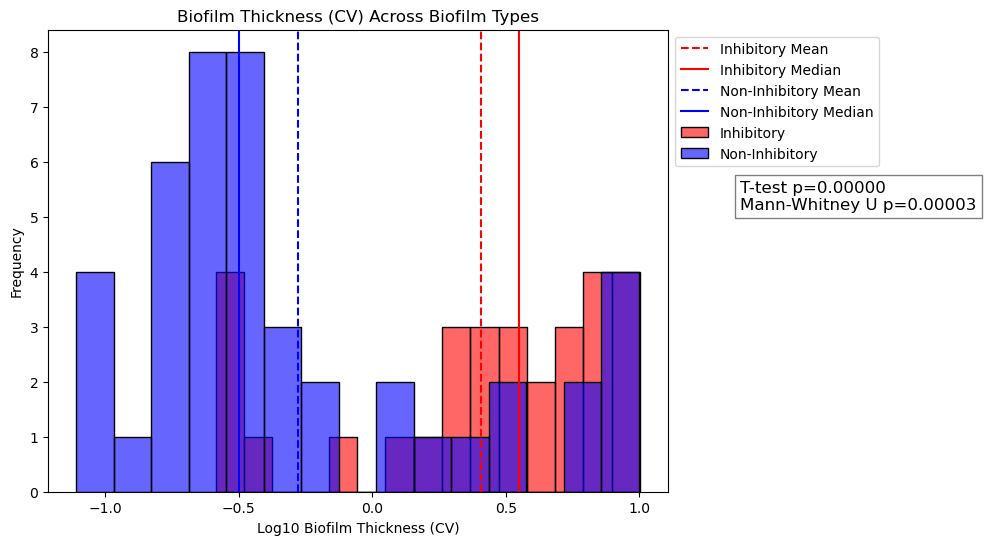

T-test for Biofilm Thickness (CV): t = 5.091, p = 0.00000
T-test for Cell Density (qPCR): t = 1.871, p = 0.06535


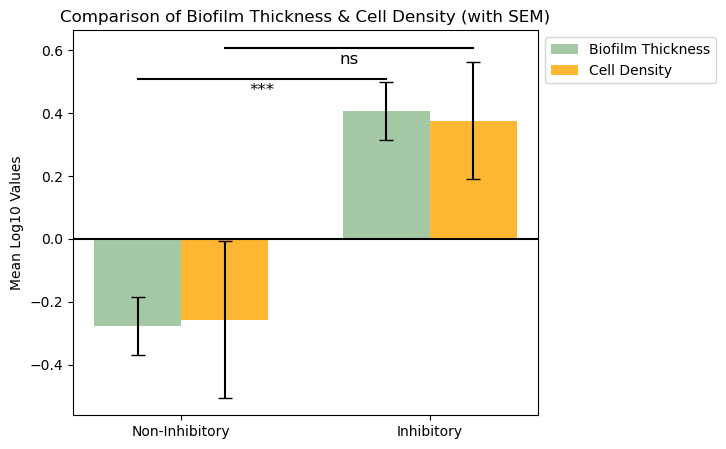

In [128]:
#USE THIS ONE

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu

# Load the dataset
file_path = "data_scaled_final.csv" 
df = pd.read_csv(file_path)

# Convert columns to numeric in case of formatting issues
df["qPCR_bact_log10"] = pd.to_numeric(df["qPCR_bact_log10"], errors="coerce")
df["CV_log10"] = pd.to_numeric(df["CV_log10"], errors="coerce")

# Drop any rows with NaN values after conversion
df.dropna(subset=["qPCR_bact_log10", "CV_log10"], inplace=True)

# Group data by inhibitory status
inhibitory_group = df[df["Inhibitory"] == 1]
non_inhibitory_group = df[df["Inhibitory"] == 0]

# Compute means
grouped = df.groupby("Inhibitory")[["qPCR_bact_log10", "CV_log10"]]
means = grouped.mean()

# Define means and medians
mean_cv_inhib = means.loc[1, "CV_log10"]
mean_cv_non_inhib = means.loc[0, "CV_log10"]

mean_qpcr_inhib = means.loc[1, "qPCR_bact_log10"]
mean_qpcr_non_inhib = means.loc[0, "qPCR_bact_log10"]

medians = df.groupby("Inhibitory")[["qPCR_bact_log10", "CV_log10"]].median()
median_cv_inhib = medians.loc[1, "CV_log10"]
median_cv_non_inhib = medians.loc[0, "CV_log10"]

median_qpcr_inhib = medians.loc[1, "qPCR_bact_log10"]
median_qpcr_non_inhib = medians.loc[0, "qPCR_bact_log10"]

# Compute summary statistics
summary_stats = df.groupby("Inhibitory")[["CV_log10", "qPCR_bact_log10"]].describe()
print(summary_stats)

# Perform t-tests
t_stat_qpcr, p_val_qpcr = ttest_ind(inhibitory_group["qPCR_bact_log10"], non_inhibitory_group["qPCR_bact_log10"])
t_stat_cv, p_val_cv = ttest_ind(inhibitory_group["CV_log10"], non_inhibitory_group["CV_log10"])

print(f"T-test for qPCR Bacterial Cell Density: t={t_stat_qpcr:.3f}, p={p_val_qpcr:.5f}")
print(f"T-test for Biofilm Thickness (CV): t={t_stat_cv:.3f}, p={p_val_cv:.5f}")

# Alternative non-parametric test (Mann-Whitney U test) in case data is not normally distributed
u_stat_qpcr, p_mwu_qpcr = mannwhitneyu(inhibitory_group["qPCR_bact_log10"], non_inhibitory_group["qPCR_bact_log10"])
u_stat_cv, p_mwu_cv = mannwhitneyu(inhibitory_group["CV_log10"], non_inhibitory_group["CV_log10"])

print(f"Mann-Whitney U test for qPCR Bacterial Cell Density: U={u_stat_qpcr}, p={p_mwu_qpcr:.5f}")
print(f"Mann-Whitney U test for Biofilm Thickness (CV): U={u_stat_cv}, p={p_mwu_cv:.5f}")

# Histogram for qPCR bacterial cell density
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(df[df["Inhibitory"] == 1]["qPCR_bact_log10"], bins=15, alpha=0.6, label="Inhibitory", color="red", kde=False)
sns.histplot(df[df["Inhibitory"] == 0]["qPCR_bact_log10"], bins=15, alpha=0.6, label="Non-Inhibitory", color="blue", kde=False)
ax.axvline(mean_qpcr_inhib, color="red", linestyle="dashed", label="Inhibitory Mean")
ax.axvline(median_qpcr_inhib, color="red", linestyle="solid", label="Inhibitory Median")
ax.axvline(mean_qpcr_non_inhib, color="blue", linestyle="dashed", label="Non-Inhibitory Mean")
ax.axvline(median_qpcr_non_inhib, color="blue", linestyle="solid", label="Non-Inhibitory Median")
ax.set_title("Cell Density (qPCR) Across Biofilm Types")
ax.set_xlabel("Log10 qPCR Bacterial Cell Density")
ax.set_ylabel("Frequency")

# Statistical test results outside to the right
plt.figtext(0.99, 0.58, f"T-test p={p_val_qpcr:.5f}\nMann-Whitney U p={p_mwu_qpcr:.5f}",
            fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Legend outside to the right
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

# Add borders
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['top'].set_visible(True)

plt.show()

# Histogram for biofilm thickness
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(df[df["Inhibitory"] == 1]["CV_log10"], bins=15, alpha=0.6, label="Inhibitory", color="red", kde=False)
sns.histplot(df[df["Inhibitory"] == 0]["CV_log10"], bins=15, alpha=0.6, label="Non-Inhibitory", color="blue", kde=False)
ax.axvline(mean_cv_inhib, color="red", linestyle="dashed", label="Inhibitory Mean")
ax.axvline(median_cv_inhib, color="red", linestyle="solid", label="Inhibitory Median")
ax.axvline(mean_cv_non_inhib, color="blue", linestyle="dashed", label="Non-Inhibitory Mean")
ax.axvline(median_cv_non_inhib, color="blue", linestyle="solid", label="Non-Inhibitory Median")
ax.set_title("Biofilm Thickness (CV) Across Biofilm Types")
ax.set_xlabel("Log10 Biofilm Thickness (CV)")
ax.set_ylabel("Frequency")

# Statistical test results outside to the right
plt.figtext(0.99, 0.58, f"T-test p={p_val_cv:.5f}\nMann-Whitney U p={p_mwu_cv:.5f}",
            fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Legend outside to the right
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

# Add borders
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['top'].set_visible(True)

plt.show()

###

#Create Bar Plot
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Calculate means and standard errors
grouped = df.groupby("Inhibitory")[["CV_log10", "qPCR_bact_log10"]]
means = grouped.mean()
sem = grouped.sem()  # Standard error of the mean

# Define significance levels based on p-values
def significance_label(p):
    if p < 0.001:
        return "***"  # Highly significant
    elif p < 0.01:
        return "**"  # Very significant
    elif p < 0.05:
        return "*"  # Significant
    else:
        return "ns"  # Not significant

# Calculate significance for annotations
p_thickness = stats.ttest_ind(df[df["Inhibitory"] == 1]["CV_log10"], df[df["Inhibitory"] == 0]["CV_log10"])[1]
p_density = stats.ttest_ind(df[df["Inhibitory"] == 1]["qPCR_bact_log10"], df[df["Inhibitory"] == 0]["qPCR_bact_log10"])[1]

t_stat_thickness, p_thickness = stats.ttest_ind(
    df[df["Inhibitory"] == 1]["CV_log10"],
    df[df["Inhibitory"] == 0]["CV_log10"]
)

t_stat_density, p_density = stats.ttest_ind(
    df[df["Inhibitory"] == 1]["qPCR_bact_log10"],
    df[df["Inhibitory"] == 0]["qPCR_bact_log10"]
)
print(f"T-test for Biofilm Thickness (CV): t = {t_stat_thickness:.3f}, p = {p_thickness:.5f}")
print(f"T-test for Cell Density (qPCR): t = {t_stat_density:.3f}, p = {p_density:.5f}")


# Define colors and bar width
bar_width = 0.35  
x_labels = ["Non-Inhibitory", "Inhibitory"]
x = np.arange(len(x_labels))  # Position for bars

fig, ax = plt.subplots(figsize=(6, 5))

# Plot Biofilm Thickness (CV_log10)
ax.bar(x - bar_width/2, means["CV_log10"], yerr=sem["CV_log10"], capsize=5,
       width=bar_width, label="Biofilm Thickness", color="darkseagreen", alpha=0.8)

# Plot Cell Density (qPCR_bact_log10)
ax.bar(x + bar_width/2, means["qPCR_bact_log10"], yerr=sem["qPCR_bact_log10"], capsize=5,
       width=bar_width, label="Cell Density", color="orange", alpha=0.8)

# Add a black horizontal line at y=0 for reference
ax.axhline(0, color='black', linewidth=1.5, linestyle='solid')

# Labels and Formatting
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.set_ylabel("Mean Log10 Values")
ax.set_title("Comparison of Biofilm Thickness & Cell Density (with SEM)")
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

# Adjust positions for significance annotations
y_max = max(means["CV_log10"].max(), means["qPCR_bact_log10"].max()) + 0.1  # Set height for annotations
y_min = min(means["CV_log10"].min(), means["qPCR_bact_log10"].min()) - 0.1

# Draw bracket for Biofilm Thickness significance
ax.plot([0 - bar_width/2, 1 - bar_width/2], [y_max, y_max], color="black", lw=1.5)
ax.text(0.5 - bar_width/2, y_max - 0.05, significance_label(p_thickness), ha="center", fontsize=12)

# Draw bracket for Cell Density significance
ax.plot([0 + bar_width/2, 1 + bar_width/2], [y_max + 0.1, y_max + 0.1], color="black", lw=1.5)
ax.text(0.5 + bar_width/2, y_max + 0.05, significance_label(p_density), ha="center", fontsize=12)

plt.show()

In [104]:
# Group data and calculate means & SEM
means = df.groupby("Inhibitory")[["CV_log10", "qPCR_bact_log10"]].mean()
sem = df.groupby("Inhibitory")[["CV_log10", "qPCR_bact_log10"]].sem()

print(means)  # Debugging step to check actual mean values


            CV_log10  qPCR_bact_log10
Inhibitory                           
0          -0.277814        -0.256540
1           0.407460         0.376258


In [106]:
means = means.abs()  # Take absolute values if log-transformation introduced negatives